<a href="https://colab.research.google.com/github/KhangTran139/Vietnam-Traffic-Sign-Detection/blob/main/Traffic_detection_by_yolov11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.6 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KVLLODSEnbg6NKcyQf8O")
project = rf.workspace("khang-kax5r").project("vietnam-traffic-sign-altsi-eyvgv")
version = project.version(1)
dataset = version.download("yolov11")
print("da tai xong data")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 116.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Vietnam-Traffic-Sign-1 in yolov11:: 100%|██████████| 19282/19282 [00:03<00:00, 5902.30it/s]


da tai xong data


In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11m.pt")
model.train(
    data="/content/Vietnam-Traffic-Sign-1/data.yaml",
    epochs=20,
    imgsz=320,
    batch=4,
    name="traffic_signs_yolo11m"
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Vietnam-Traffic-Sign-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e0a71738a70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,   

In [ ]:
#Tải model xuống
from google.colab import files
files.download('/content/runs/detect/traffic_signs_yolo11m/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#tải lại model nếu sau dùng
from ultralytics import YOLO

model = YOLO("runs/detect/traffic_signs_yolo11m/weights/best.pt")

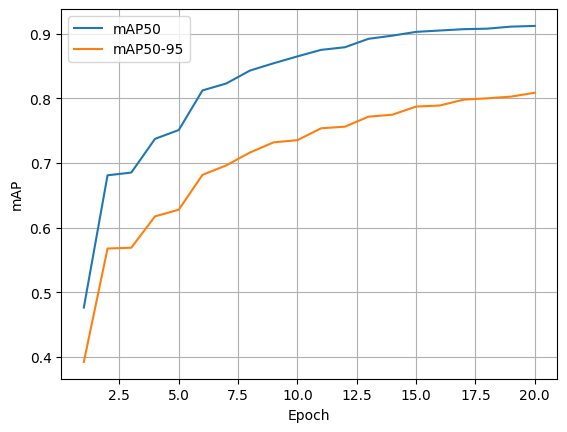

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Vẽ mAP50 và mAP50-95
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP50-95')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.legend()
plt.grid()
plt.show()

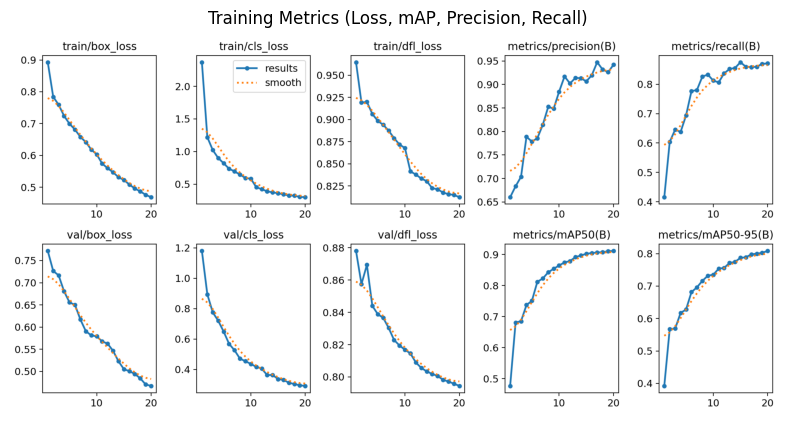

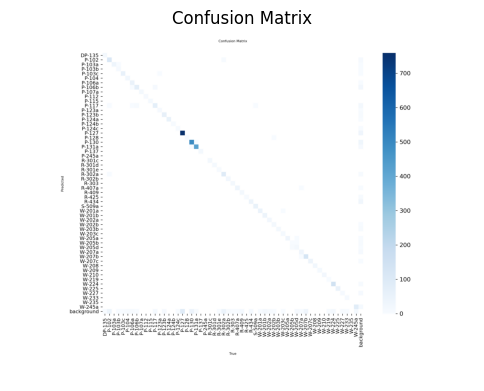

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path

# Đường dẫn đến thư mục huấn luyện
exp_dir = Path("runs/detect/traffic_signs_yolo11m")

# Hiển thị các biểu đồ từ YOLO
# (loss, precision, recall, mAP)
plt.figure(figsize=(10, 7))
img = plt.imread(exp_dir / "results.png")
plt.imshow(img)
plt.axis("off")
plt.title("Training Metrics (Loss, mAP, Precision, Recall)")
plt.show()

# Nếu cần xem confusion matrix
plt.figure(figsize=(6, 6))
img2 = plt.imread(exp_dir / "confusion_matrix.png")
plt.imshow(img2)
plt.axis("off")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import gradio as gr
from ultralytics import YOLO

model = YOLO('runs/detect/traffic_signs_yolo11m/weights/best.pt')

def detect_image(image):
    results = model.predict(source=image, conf=0.3)
    return results[0].plot()

gr.Interface(fn=detect_image, inputs="image", outputs="image", title="Traffic Sign Detector YOLOv11").launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://62d1c4c49a553f6a0a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
